```{contents}
```

## Hyperparameter Tuning in Decision Tree


* **Hyperparameters** are settings that **control how the tree grows**, rather than learned from the data.
* **Tuning** means selecting the combination that **gives the best performance on unseen data**, usually validated with cross-validation.

---

## **Key Hyperparameters of Decision Tree**

| Hyperparameter      | Description                             | Effect                                      |
| ------------------- | --------------------------------------- | ------------------------------------------- |
| `max_depth`         | Maximum depth of the tree               | Lower → underfitting, Higher → overfitting  |
| `min_samples_split` | Min samples required to split a node    | Higher → simpler tree, Lower → complex tree |
| `min_samples_leaf`  | Min samples required at a leaf          | Larger → smoother predictions               |
| `max_features`      | Max features to consider for a split    | Reduces variance, increases bias            |
| `max_leaf_nodes`    | Maximum number of leaves                | Restricts tree growth                       |
| `criterion`         | Split quality measure (`squared_error`) | Determines how splits are chosen            |

**Goal:** Balance between **bias and variance** to improve generalization.

---

## **2. Overfitting vs Underfitting**

| Issue            | Description                                  | Symptoms                              | How to Handle                                                                                                                                               |
| ---------------- | -------------------------------------------- | ------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Overfitting**  | Tree is too complex, memorizes training data | Very high train score, low test score | 1. Reduce `max_depth` 2. Increase `min_samples_leaf` 3. Increase `min_samples_split` 4. Limit `max_leaf_nodes` 5. Prune tree / use ensemble (Random Forest) |
| **Underfitting** | Tree is too simple, cannot capture patterns  | Both train & test scores are low      | 1. Increase `max_depth` 2. Reduce `min_samples_leaf` 3. Reduce `min_samples_split` 4. Add more features                                                     |

---

## **3. Practical Steps for Hyperparameter Tuning**

### **Step 1: Identify the problem**

* Check train vs test performance using metrics like **R², RMSE, MAE**.

### **Step 2: Tune hyperparameters**

* Use **GridSearchCV** or **RandomizedSearchCV** to find optimal hyperparameters.

Example grid:

```python
param_grid = {
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}
```

### **Step 3: Validate using cross-validation**

* Ensures hyperparameters generalize to unseen data.

### **Step 4: Evaluate**

* Check **train/test R², RMSE** and ensure the gap is not too large (prevents overfitting).

---

## **4. Tips to Handle Overfitting/Underfitting**

### **Overfitting**

1. Limit tree depth: `max_depth`
2. Set minimum samples per leaf: `min_samples_leaf`
3. Set minimum samples to split: `min_samples_split`
4. Limit number of leaf nodes: `max_leaf_nodes`
5. Use **ensemble methods** like Random Forest or Gradient Boosting

### **Underfitting**

1. Increase tree depth
2. Reduce `min_samples_leaf` / `min_samples_split`
3. Add more features or interaction terms
4. Ensure data preprocessing is correct

---

### **5. Visual intuition**

* **Shallow tree** → Underfitting (misses patterns)
* **Deep tree** → Overfitting (memorizes noise)
* **Properly tuned tree** → Captures patterns, generalizes well




Underfitting Tree Performance:
Train R²: 0.32
Test R²: 0.47


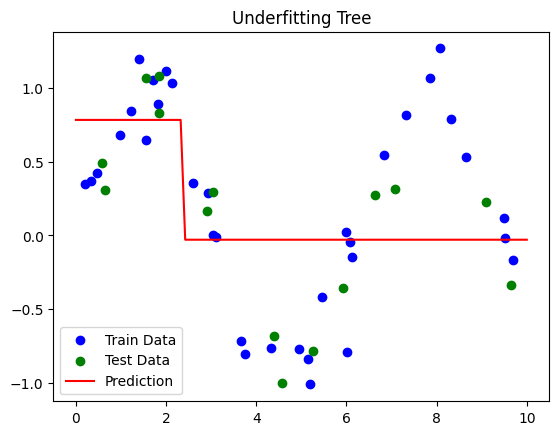


Overfitting Tree Performance:
Train R²: 1.00
Test R²: 0.87


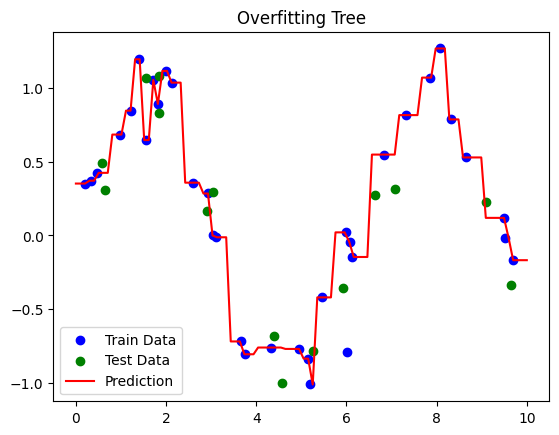


Properly Tuned Tree Performance:
Train R²: 0.94
Test R²: 0.82


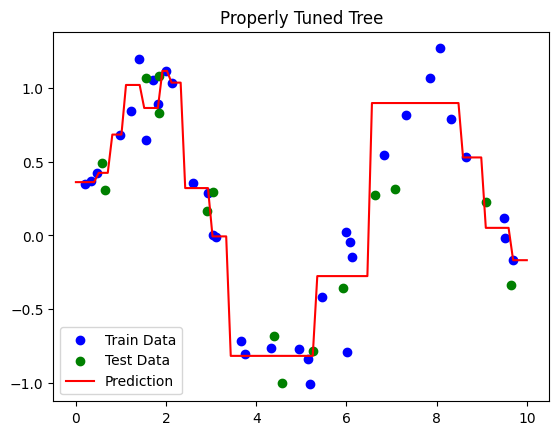

: 

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Create Sample Dataset
np.random.seed(42)
X = np.sort(np.random.rand(50, 1) * 10, axis=0)  # Features
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # Target with noise

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate a model
def evaluate_dtr(model, X_train, X_test, y_train, y_test, label="Model"):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"\n{label} Performance:")
    print(f"Train R²: {r2_score(y_train, y_train_pred):.2f}")
    print(f"Test R²: {r2_score(y_test, y_test_pred):.2f}")
    
    # Plot
    plt.scatter(X_train, y_train, c='blue', label='Train Data')
    plt.scatter(X_test, y_test, c='green', label='Test Data')
    X_plot = np.linspace(0, 10, 100).reshape(-1,1)
    plt.plot(X_plot, model.predict(X_plot), c='red', label='Prediction')
    plt.title(label)
    plt.legend()
    plt.show()

# ----------------------
# Underfitting Example
# ----------------------
dtr_underfit = DecisionTreeRegressor(max_depth=1, random_state=42)
evaluate_dtr(dtr_underfit, X_train, X_test, y_train, y_test, label="Underfitting Tree")

# ----------------------
# Overfitting Example
# ----------------------
dtr_overfit = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, random_state=42)
evaluate_dtr(dtr_overfit, X_train, X_test, y_train, y_test, label="Overfitting Tree")

# ----------------------
# Properly Tuned Tree using GridSearchCV
# ----------------------
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                           param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
best_dtr = grid_search.best_estimator_
evaluate_dtr(best_dtr, X_train, X_test, y_train, y_test, label="Properly Tuned Tree")



### **Interpretation**

1. **Dataset**:

   * $y = \sin(X) + \text{noise}$ → nonlinear pattern with randomness.
2. **Underfitting Tree**:

   * Very shallow (`max_depth=1`) → misses the sine pattern.
   * Low train and test R².
3. **Overfitting Tree**:

   * Grows fully (`max_depth=None`, `min_samples_leaf=1`) → memorizes training data.
   * High train R², low test R².
4. **Properly Tuned Tree**:

   * GridSearchCV finds optimal `max_depth`, `min_samples_split`, `min_samples_leaf`.
   * Balances bias and variance → good train/test R².

